In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Método de Shooting Oscilador Armónico Cuántico


El código desarrollado puede ser utilizado y editado en la hoja de Google Colab en el siguiente link

<br>

<a href="https://colab.research.google.com/github/lauramscs/Metodos-numericos/blob/main/Shooting_Oscilador_Armonico.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

El potencial asociado al Oscilador Armónico Cuántico es $V=\frac{1}{2}m \omega^2 z^² $. Al sustituirlo en la ecuación de Schrödinger independiente del tiempo obtenemos
$$\frac{\hbar}{2m}\frac{d^2\psi(z)}{dz^2}+\frac{1}{2}m\omega^2z^2 \psi(z)=E\psi(z)$$

Podemos reescribir 
$$x=\sqrt{\frac{m\omega}{\hbar}}z$$
$$K=\frac{2E}{\hbar\omega}$$
Y obtenemos 
$$\frac{d^2\psi(x)}{dx^2}=(x^2-K)\psi(x)$$

Para resolver esta ecuación diferencial por el método de Shooting haremos uso del método de Runge-Kutta de 4to orden y del método Newton-Raphson analizados previamente.

In [2]:
def rk4(t0, tf, x0, f, h):

    t = linspace(t0,tf,round(abs(t0-tf)/h)+1)  
    x = zeros((size(t), size(x0)))
    x[0] = x0
    
    for (n, tn) in enumerate(t[:-1]):        
        k1 = f(tn, x[n])
        k2 = f(tn + h/2, x[n] + h*k1/2)
        k3 = f(tn + h/2, x[n] + h*k2/2)
        k4 = f(tn + h, x[n] + h*k3)     
        x[n+1] = x[n] + h*(k1 + 2*k2 + 2*k3 + k4)/6    
    return t, x
#Funciona unicamente integrando de izquierda a derecha 

In [3]:
def OA(x,v): #Definimos la función OA que depende de x y de v el arreglo que guarda phi y su derivada$
    l = zeros(2)
    l[0]=v[1]
    l[1]=(x**2-K)*v[0]
    return l
#Nos regresa un arreglo con la primer y segunda derivada de phi

In [4]:
#Fijamos x1 y el tamaño del paso, así como  la derivada de phi en x1
x1 = -5.0
h = 1e-3
phi0 = 0.1  #ESTE VALOR NO IMPORTA
K=3

dphi0 = - 2*x1 * phi0  

In [5]:
x, v =rk4(x1, -x1, array([phi0,dphi0]) ,OA, h)

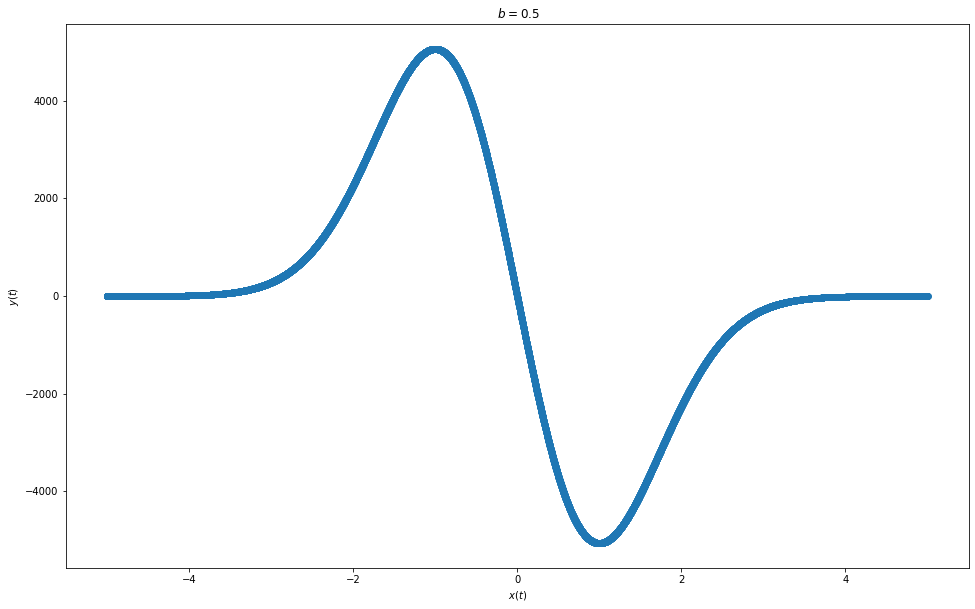

In [6]:
fig, ax = subplots(figsize = (16.18,10))
ax.set_title(" $b = 0.5$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$y(t)$")
ax.scatter(x, v.T[0])
plt.show()

In [7]:
def NR(f,x0,tol,dV): #Definimos el Newton-Raphson en una sola dimensión
    x = x0
    err = abs(f(x))
    while err>tol:
        df = (f(x+dV)-f(x))/dV
        x = x -f(x)/df
        err = abs(f(x))
    return x    

In [8]:
#Fijamos las condiciones. X1 será el punto de inicio
X1= -5.0
X2= -X1
dT=1e-3
phi0 = 0.1  
dphi0 = -2*X1*phi0
Kseed= 2. #Damos una semilla para K

In [9]:
#Definimos la funcione func la cual regresa la diferencia entre el último valor 
#de phi obtenido en el Runge-kutta y phi0 fijados anteriormente
def func(Koo):
    global K
    K=Koo
    tt, vv =rk4(X1, X2, array([phi0,dphi0]) ,OA, dT)
    diff = abs(vv[-1,0])-abs(phi0)
    return diff

In [10]:
K

3

In [11]:
func(Kseed)

161988403.9857132

In [12]:
#La solución nos dará un valor para K tal que func se vaya a cero
Sol=NR(func,Kseed,1e-5,1e-6)
Sol

3.000000007343325

In [13]:
func(Sol) #Evaluamos func en el valor obtenido y vemos que el valor se va a cero

-2.3468694737571738e-08